Through a real-world challenge, this hackathon aims to enhance competitors' data science and innovative analytical thinking abilities. Get an opportunity to work on a remarkable data science technology by competing with the best brains in this area at this point in time, where artificial intelligence and machine learning are at the forefront of attention, and find out how you stack up!

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared 
error and finally submitting the predictions in the given template.

* Distance
* Time of travel
* Duration of travel
* Tolls
* Location
* Type of car
* Price
* Day or Night
* Demand and Supply
* Rating of the driver
* Payment type - may or may not work
* working day or weekend
* cab sharing/ pooled car

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')
combined= pd.concat([train,test],ignore_index=True)

In [3]:
train.shape, test.shape,combined.shape

((35000, 20), (15000, 19), (50000, 20))

In [4]:
combined

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,1121.0,NaN
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,1744.0,NaN
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,1362.0,NaN
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,101.0,NaN


## Univariate Analysis

In [5]:
# list of numeric variables

combined.select_dtypes(include=np.number).columns
num_cols= ['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration']

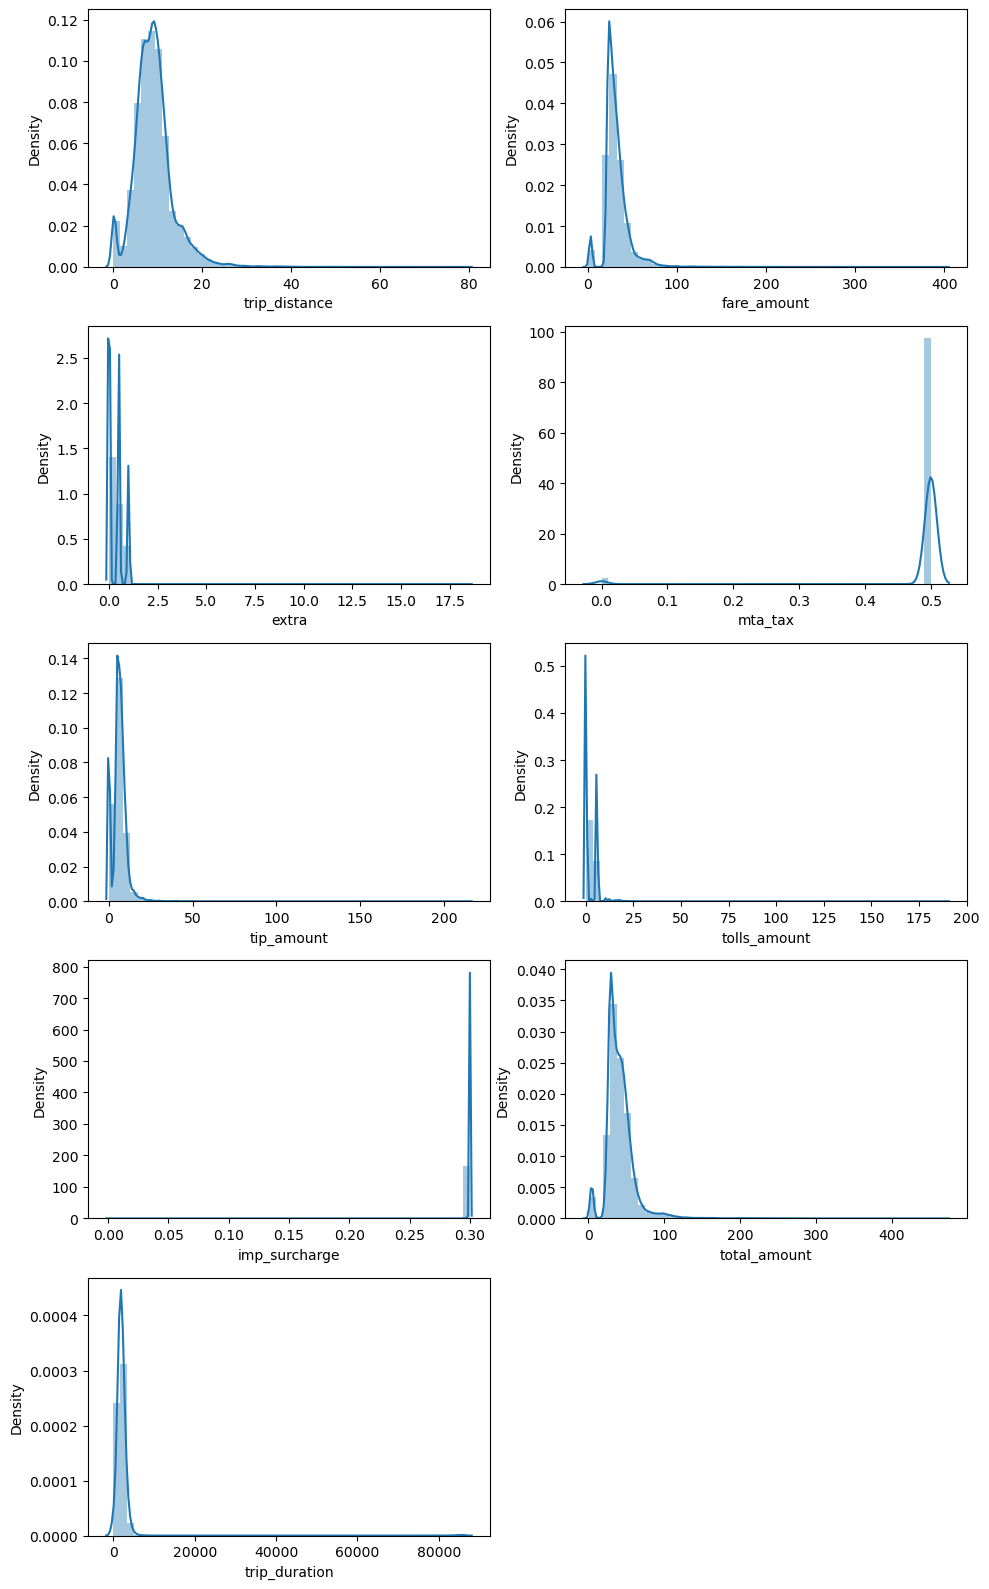

In [6]:
plt.figure(figsize=(10,16))
t=1
for i in num_cols:
    plt.subplot(5,2,t)
    sns.distplot(combined[i])
    t+=1
plt.tight_layout()
plt.show()

In [7]:
# categorical

cat_cols=['store_and_fwd_flag','rate_code', 'payment_type','pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day']

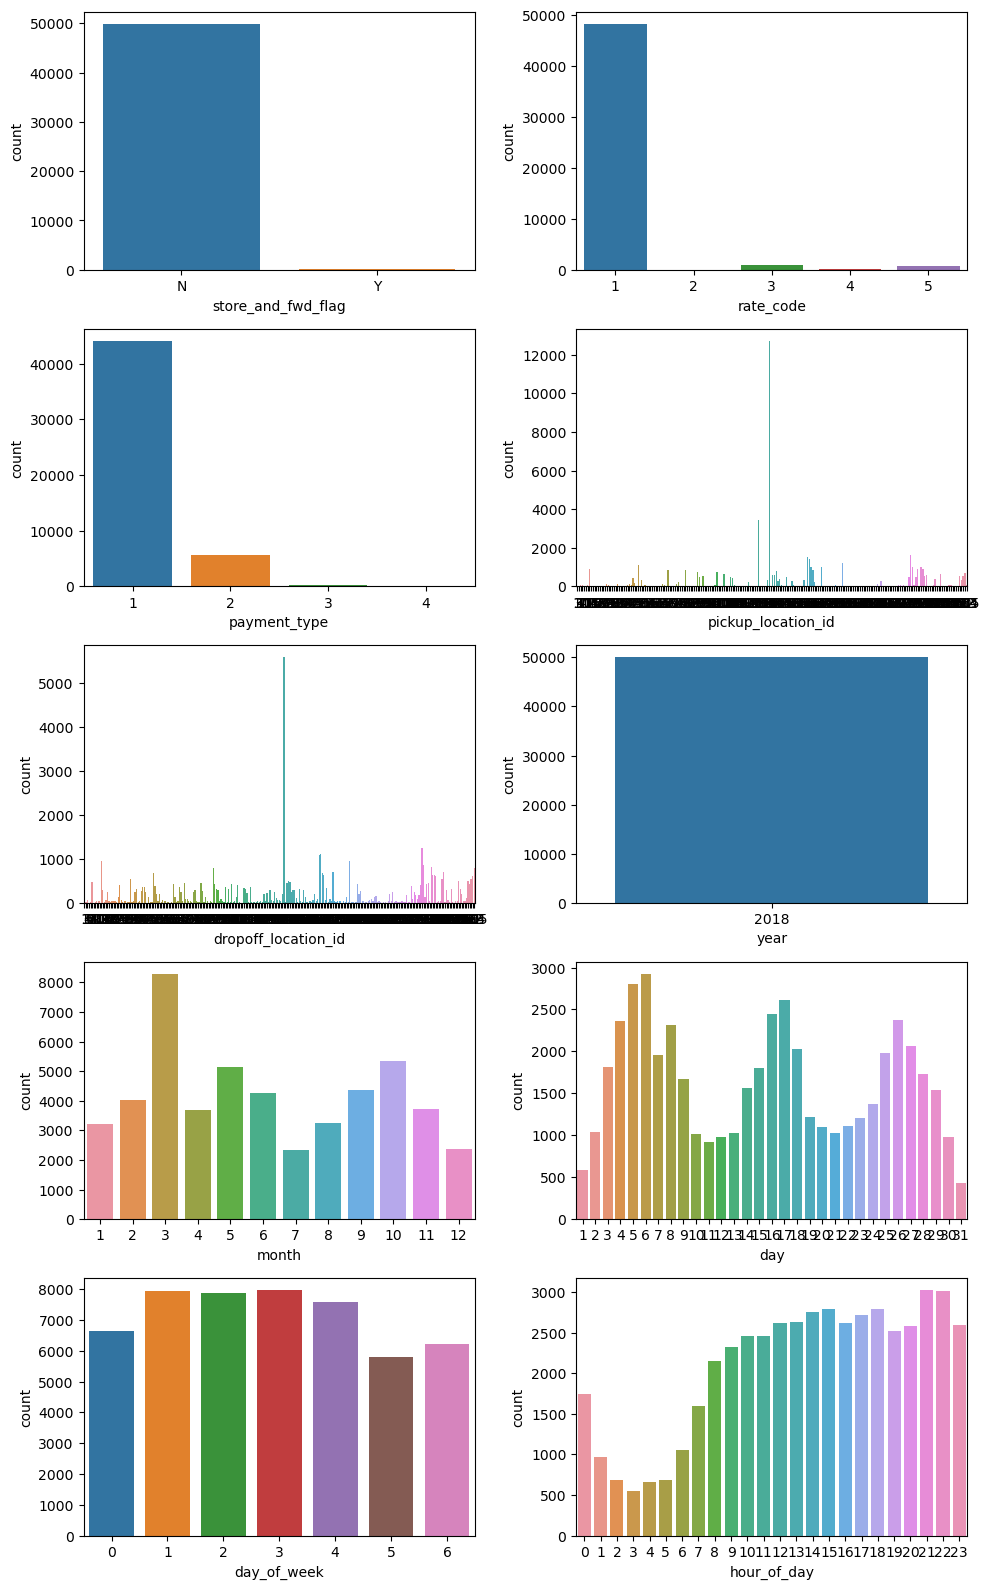

In [8]:
plt.figure(figsize=(10,16))
t=1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data=combined,x=i)
    t+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis
    * Num vs Target
    * Cat vs target

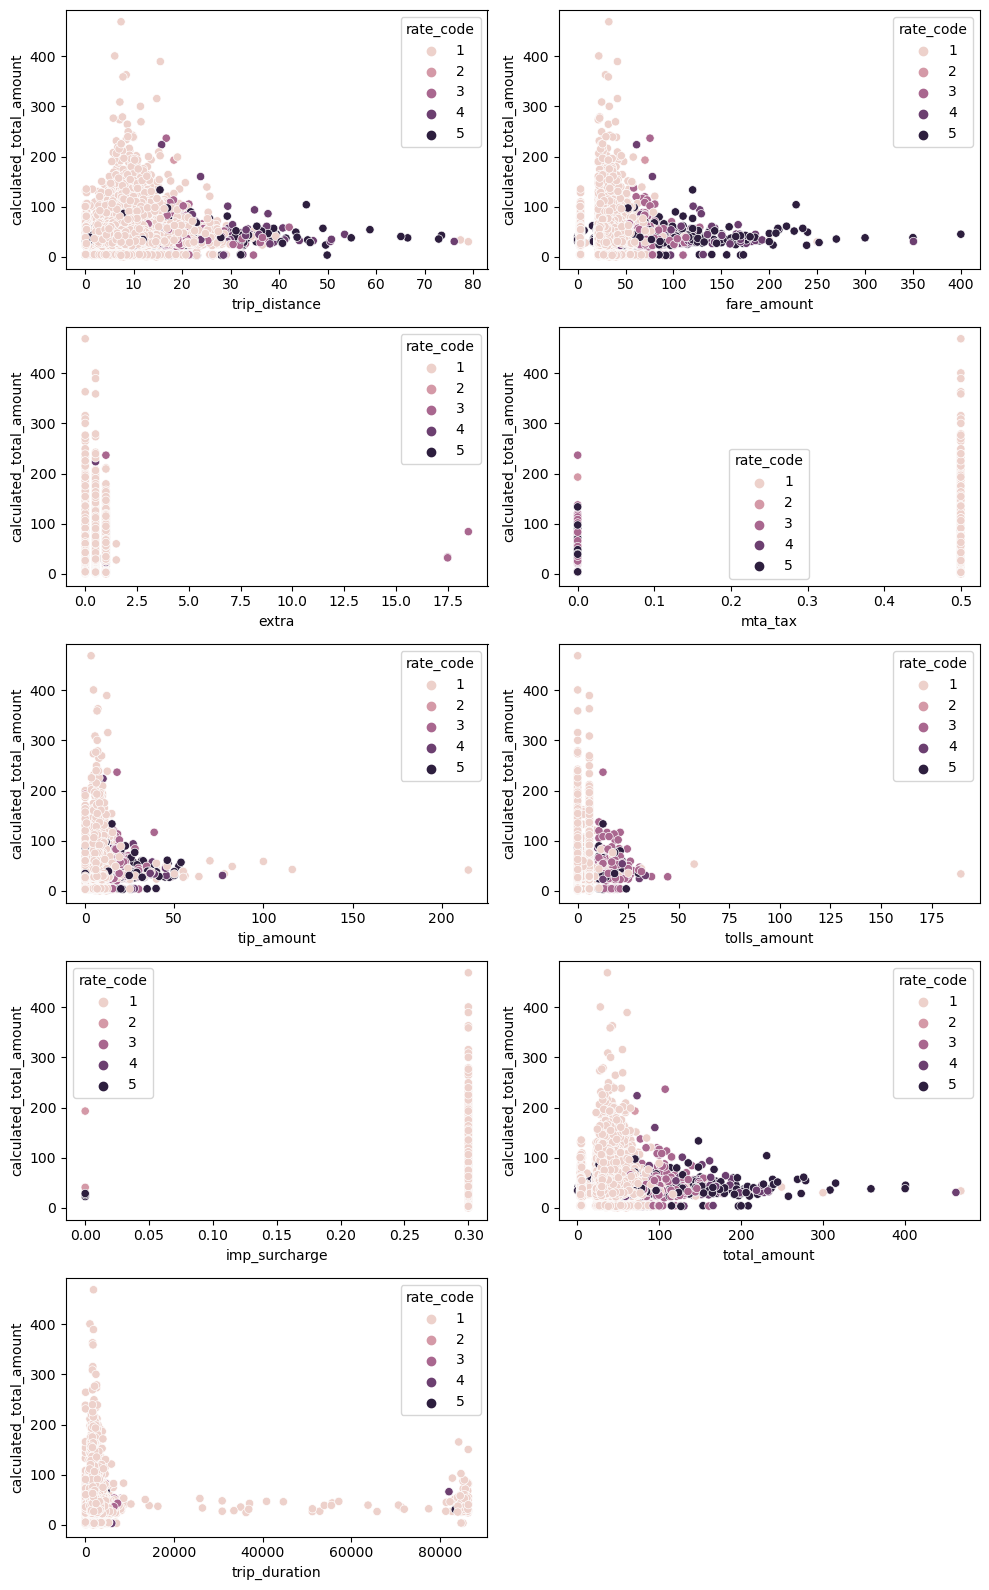

In [9]:
# num vs target

plt.figure(figsize=(10,16))
t=1
for i in num_cols:
    plt.subplot(5,2,t)
    sns.scatterplot(x=combined[i],y= combined.calculated_total_amount,color='hotpink',hue=combined.rate_code)
    t+=1
plt.tight_layout()
plt.show()

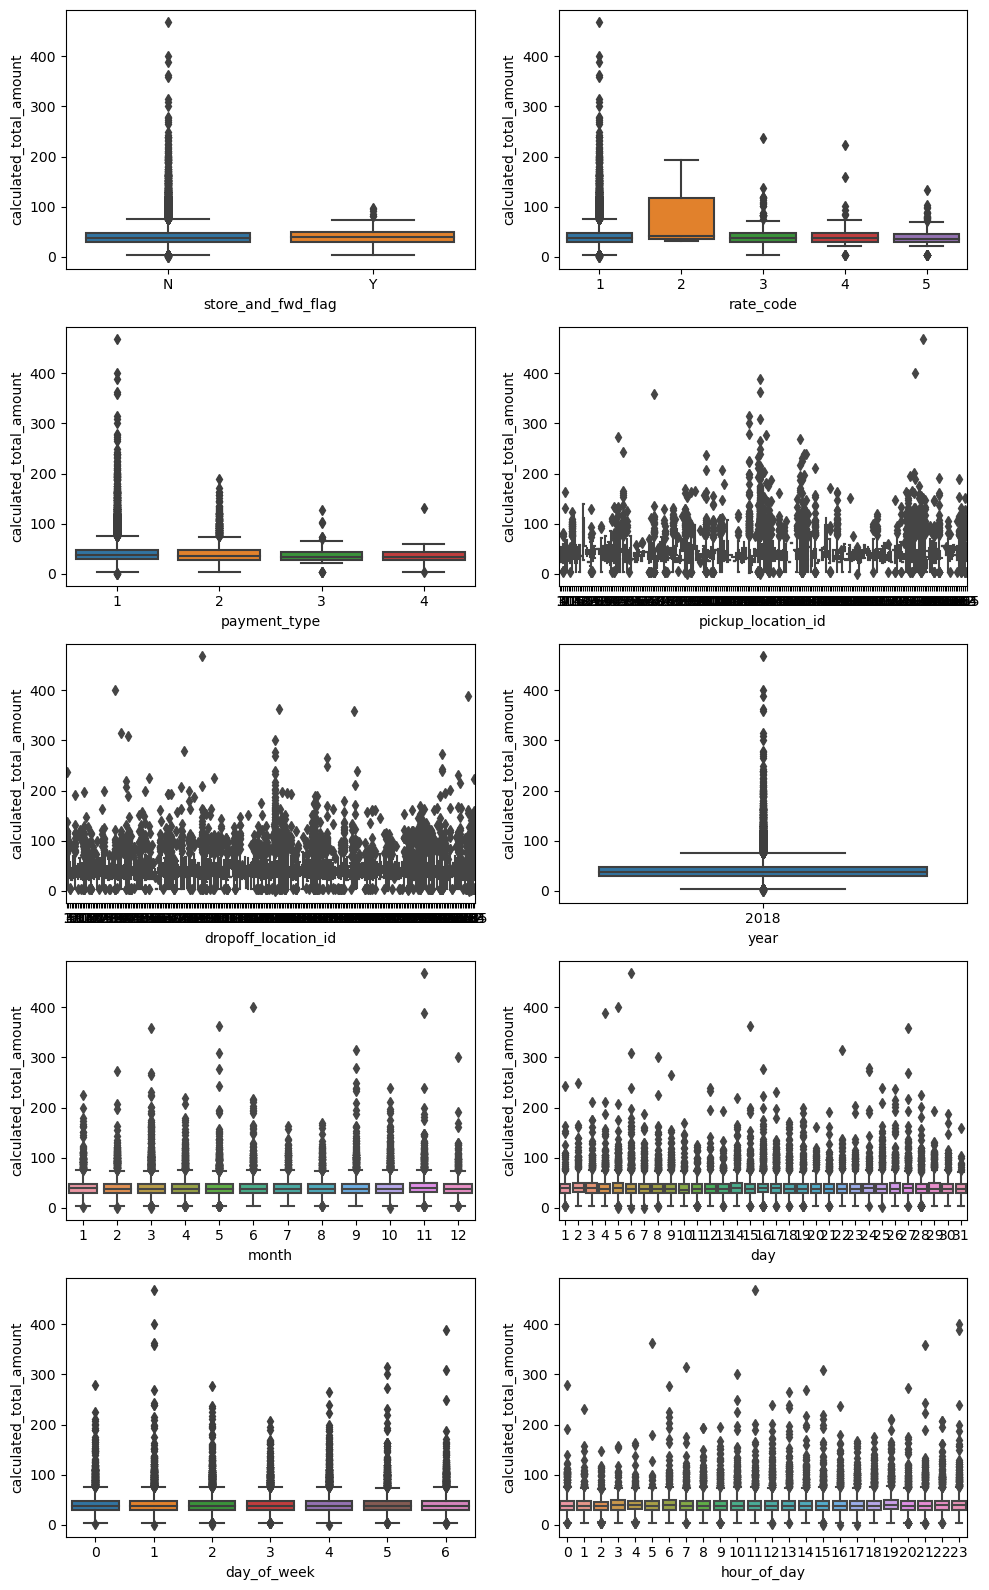

In [10]:
# cat vs target

plt.figure(figsize=(10,16))
t=1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.boxplot(data=combined,x=i,y= combined.calculated_total_amount)
    t+=1
plt.tight_layout()
plt.show()

## missing values

In [11]:

combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

Hence, no null or missing values

## Feature Engineering


In [12]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [13]:
# trip duration in Hours
combined['trip_duration']= combined.trip_duration/3600

In [14]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80


In [15]:
# pickup and drop location
combined.pickup_location_id.value_counts()[:5].index

Index([138, 132, 230, 161, 162], dtype='int64', name='pickup_location_id')

In [16]:
localdf=pd.DataFrame(combined.pickup_location_id.astype(str)+"_"+combined.dropoff_location_id.astype(str),columns=['Loc'])

In [17]:
combined['pick_&_drop']=localdf=pd.DataFrame(combined.pickup_location_id.astype(str)+"_"+combined.dropoff_location_id.astype(str))

In [18]:
    pd.set_option("display.max_columns",50)
combined

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30,262_138
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40,263_236
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36,138_230
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30,186_138
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80,162_87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,0.311389,NaN,148_143
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,0.484444,NaN,163_85
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,0.378333,NaN,138_107
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,0.028056,NaN,170_138


<Axes: xlabel='hour_of_day', ylabel='calculated_total_amount'>

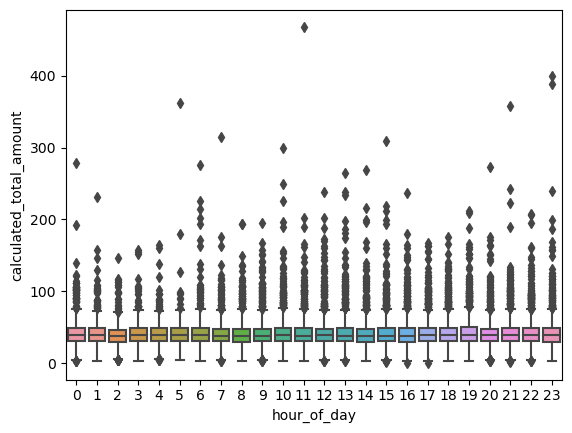

In [19]:
# Hour of the day

sns.boxplot(y=combined.calculated_total_amount,x=combined.hour_of_day,data=combined)

In [20]:
# busy hours...
busy=[0,5,7,10,11,13,14,15,19,20,21,23]

def imbusy(x):
    if x in busy:
        return('Peak_Hour')
    else:
        return('Ease_Hour')

In [21]:
combined['magic6']= combined.hour_of_day.apply(imbusy)

<Axes: xlabel='magic6', ylabel='calculated_total_amount'>

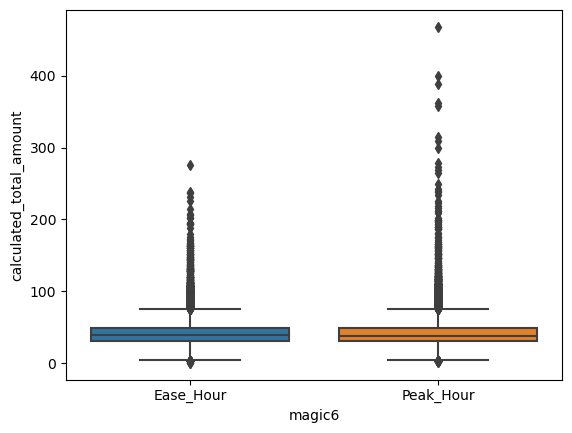

In [22]:
sns.boxplot(x=combined.magic6,y=combined.calculated_total_amount,data=combined)

<Axes: xlabel='calculated_total_amount', ylabel='day'>

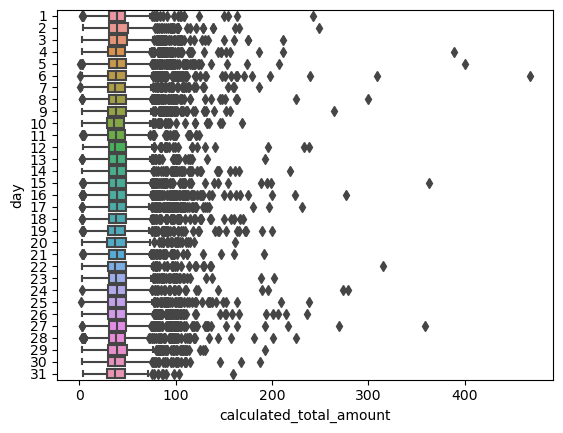

In [23]:
sns.boxplot(y= combined.day,x=combined.calculated_total_amount,data=combined,orient='h')

In [24]:
busy_days= [4,5,6,8,15,16,22,24,27]

def busy(x):
    if x in busy_days:
        return('Busy_Days')
    else:
        return('Lean_Days')

In [25]:
combined['magic7']= combined.day.apply(busy)

<Axes: xlabel='calculated_total_amount', ylabel='magic7'>

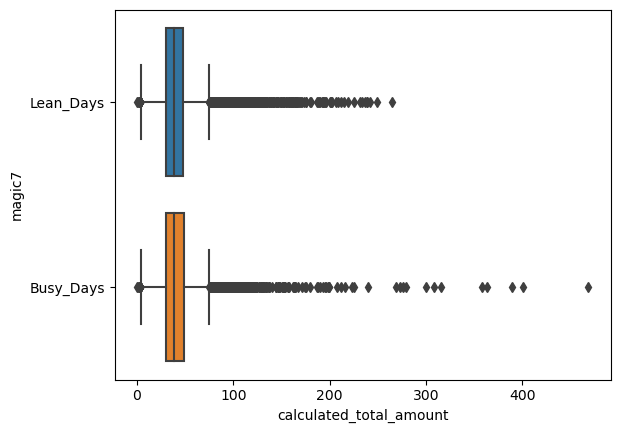

In [26]:
sns.boxplot(y= combined.magic7,x=combined.calculated_total_amount,data=combined,orient='h')

In [27]:
# Day wise avg fare
combined.groupby('day')['calculated_total_amount'].describe()

combined['magic8']=combined.groupby('day')['calculated_total_amount'].transform('count')
combined['magic9']=combined.groupby('day')['calculated_total_amount'].transform('mean')
combined['magic10']=combined.groupby('day')['calculated_total_amount'].transform('median')
combined['magic11']=combined.groupby('day')['calculated_total_amount'].transform('min')
combined['magic12']=combined.groupby('day')['calculated_total_amount'].transform('max')

In [28]:
# Month wise avg fare
combined.groupby('month')['calculated_total_amount'].describe()

combined['magic13']=combined.groupby('month')['calculated_total_amount'].transform('count')
combined['magic14']=combined.groupby('month')['calculated_total_amount'].transform('mean')
combined['magic15']=combined.groupby('month')['calculated_total_amount'].transform('median')
combined['magic16']=combined.groupby('month')['calculated_total_amount'].transform('min')
combined['magic17']=combined.groupby('month')['calculated_total_amount'].transform('max')

In [29]:
combined

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop,magic6,magic7,magic8,magic9,magic10,magic11,magic12,magic13,magic14,magic15,magic16,magic17
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30,262_138,Ease_Hour,Lean_Days,1351,39.589319,37.270,0.31,186.30,5786,41.450427,38.460,0.90,358.56
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40,263_236,Peak_Hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,2809,41.000997,38.160,0.31,273.30
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36,138_230,Ease_Hour,Lean_Days,1100,41.828518,38.755,3.30,192.96,2292,41.816095,39.325,2.80,225.38
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30,186_138,Peak_Hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,3062,41.214755,37.865,3.30,315.38
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80,162_87,Peak_Hour,Lean_Days,775,39.985174,37.560,3.30,161.47,2295,40.859124,37.880,3.30,168.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,0.311389,NaN,148_143,Peak_Hour,Busy_Days,1974,41.901798,39.230,0.31,400.30,3597,40.749566,38.060,3.30,362.80
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,0.484444,NaN,163_85,Peak_Hour,Busy_Days,1974,41.901798,39.230,0.31,400.30,1623,40.902557,38.160,3.30,163.80
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,0.378333,NaN,138_107,Peak_Hour,Lean_Days,723,41.143665,38.740,3.30,192.96,3062,41.214755,37.865,3.30,315.38
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,0.028056,NaN,170_138,Ease_Hour,Busy_Days,779,41.082798,37.560,3.30,315.38,2295,40.859124,37.880,3.30,168.30


In [30]:
combined.drop(['pickup_location_id','dropoff_location_id','year','month','day','hour_of_day','pick_&_drop'],axis=1,inplace=True)

In [31]:
combined

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,day_of_week,trip_duration,calculated_total_amount,magic6,magic7,magic8,magic9,magic10,magic11,magic12,magic13,magic14,magic15,magic16,magic17
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,2,0.591944,24.30,Ease_Hour,Lean_Days,1351,39.589319,37.270,0.31,186.30,5786,41.450427,38.460,0.90,358.56
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,6,0.660278,37.40,Peak_Hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,2809,41.000997,38.160,0.31,273.30
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,0,0.357222,30.36,Ease_Hour,Lean_Days,1100,41.828518,38.755,3.30,192.96,2292,41.816095,39.325,2.80,225.38
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,1,0.718333,4.30,Peak_Hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,3062,41.214755,37.865,3.30,315.38
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,0,0.437500,23.80,Peak_Hour,Lean_Days,775,39.985174,37.560,3.30,161.47,2295,40.859124,37.880,3.30,168.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,5,0.311389,NaN,Peak_Hour,Busy_Days,1974,41.901798,39.230,0.31,400.30,3597,40.749566,38.060,3.30,362.80
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,3,0.484444,NaN,Peak_Hour,Busy_Days,1974,41.901798,39.230,0.31,400.30,1623,40.902557,38.160,3.30,163.80
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,3,0.378333,NaN,Peak_Hour,Lean_Days,723,41.143665,38.740,3.30,192.96,3062,41.214755,37.865,3.30,315.38
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,2,0.028056,NaN,Ease_Hour,Busy_Days,779,41.082798,37.560,3.30,315.38,2295,40.859124,37.880,3.30,168.30


In [32]:
combined['magic18']= combined['trip_distance']/combined['trip_duration']

<Axes: xlabel='magic18', ylabel='calculated_total_amount'>

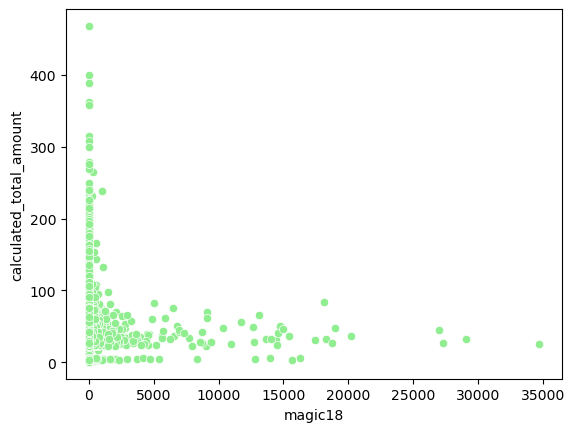

In [33]:
sns.scatterplot(x=combined.magic18,y=combined.calculated_total_amount,color='lightgreen')

In [34]:
combined

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,day_of_week,trip_duration,calculated_total_amount,magic6,magic7,magic8,magic9,magic10,magic11,magic12,magic13,magic14,magic15,magic16,magic17,magic18
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,2,0.591944,24.30,Ease_Hour,Lean_Days,1351,39.589319,37.270,0.31,186.30,5786,41.450427,38.460,0.90,358.56,15.221023
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,6,0.660278,37.40,Peak_Hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,2809,41.000997,38.160,0.31,273.30,0.302903
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,0,0.357222,30.36,Ease_Hour,Lean_Days,1100,41.828518,38.755,3.30,192.96,2292,41.816095,39.325,2.80,225.38,27.013997
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,1,0.718333,4.30,Peak_Hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,3062,41.214755,37.865,3.30,315.38,13.225058
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,0,0.437500,23.80,Peak_Hour,Lean_Days,775,39.985174,37.560,3.30,161.47,2295,40.859124,37.880,3.30,168.30,13.257143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,5,0.311389,NaN,Peak_Hour,Busy_Days,1974,41.901798,39.230,0.31,400.30,3597,40.749566,38.060,3.30,362.80,18.626227
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,3,0.484444,NaN,Peak_Hour,Busy_Days,1974,41.901798,39.230,0.31,400.30,1623,40.902557,38.160,3.30,163.80,21.674312
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,3,0.378333,NaN,Peak_Hour,Lean_Days,723,41.143665,38.740,3.30,192.96,3062,41.214755,37.865,3.30,315.38,24.052863
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,2,0.028056,NaN,Ease_Hour,Busy_Days,779,41.082798,37.560,3.30,315.38,2295,40.859124,37.880,3.30,168.30,338.613861


In [35]:
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
day_of_week                    0
trip_duration                  0
calculated_total_amount    15000
magic6                         0
magic7                         0
magic8                         0
magic9                         0
magic10                        0
magic11                        0
magic12                        0
magic13                        0
magic14                        0
magic15                        0
magic16                        0
magic17                        0
magic18                        0
dtype: int64

In [36]:
#split the data back into train and test
newtrain= combined.loc[0:train.shape[0]-1, ]
newtest= combined.loc[train.shape[0]:, ]

In [37]:
newtrain.shape,newtest.shape,train.shape,test.shape

((35000, 27), (15000, 27), (35000, 20), (15000, 19))

In [38]:
newtest.drop('calculated_total_amount',axis=1,inplace=True)

In [39]:
newtrain.shape,newtest.shape

((35000, 27), (15000, 26))

#now will will apply magic 1 to 5

newtrain.groupby('pick_&_drop')['calculated_total_amount'].describe()

newtrain['magic1']= newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('count')
newtrain['magic2']= newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('mean')
newtrain['magic3']= newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('median')
newtrain['magic4']= newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('min')
newtrain['magic5']= newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('max')

newtrain.drop(['pickup_location_id','dropoff_location_id','year','month','day','day_of_week','hour_of_day','pick_&_drop','magic1','magic2','magic3','magic4','magic5'],axis=1,inplace=True)

newtest.drop(['pickup_location_id','dropoff_location_id','year','month','day','day_of_week','hour_of_day','pick_&_drop','magic1'],axis=1,inplace=True)


In [41]:
newtrain.shape, newtest.shape

((35000, 27), (15000, 26))

## Statistical Testing

In [42]:
num_cols=['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'imp_surcharge',
 'total_amount',
 'trip_duration','magic8','magic9','magic10','magic11','magic12','magic13','magic14','magic15','magic16','magic17','magic18']

In [43]:
import scipy.stats as stats

imp_feats=[]
for i in num_cols:
    teststats,pvalue= stats.ttest_ind(newtrain.loc[:,i],newtrain.calculated_total_amount)
    if pvalue<0.05:
        imp_feats.append(i)

In [44]:
len(imp_feats)

17

In [45]:
imp_feats

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'imp_surcharge',
 'trip_duration',
 'magic8',
 'magic10',
 'magic11',
 'magic12',
 'magic13',
 'magic15',
 'magic16',
 'magic17',
 'magic18']

In [46]:
# rate code and payment type

from statsmodels.stats.anova import anova_lm

model= sfa.ols('calculated_total_amount~rate_code',data=newtrain).fit()

In [47]:
print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
rate_code      1.0  1.764871e+03  1764.870965  4.804519  0.028392
Residual   34998.0  1.285601e+07   367.335602       NaN       NaN


In [48]:
model= sfa.ols('calculated_total_amount~payment_type',data=newtrain).fit()
print(anova_lm(model))

                   df        sum_sq       mean_sq          F        PR(>F)
payment_type      1.0  2.106604e+04  21066.038965  57.434437  3.580489e-14
Residual      34998.0  1.283671e+07    366.784109        NaN           NaN


In [49]:
dummytrain= pd.get_dummies(newtrain,drop_first=True)
dummytest= pd.get_dummies(newtest,drop_first=True)

In [50]:
dummytrain.shape,dummytest.shape

((35000, 27), (15000, 26))

In [51]:
dummytrain.drop(['total_amount','magic14','magic9'],axis=1,inplace=True)

In [52]:
dummytest.drop(['total_amount','magic14','magic9'],axis=1,inplace=True)

## Model Building

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

kfold= KFold(n_splits=5,shuffle=True,random_state=42)

x= dummytrain.drop('calculated_total_amount',axis=1)
y= dummytrain.calculated_total_amount

In [ ]:
lr= LinearRegression()
gbm= GradientBoostingRegressor()
pred=[]

for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))

In [ ]:
# Linear Regression
final_lr= pd.DataFrame(pred).T.mean(axis=1)


In [ ]:
# GBM
final_gbm= pd.DataFrame(pred).T.mean(axis=1)

In [ ]:
submission['calculated_total_amount']= final_lr

In [ ]:
submission.to_csv('LRMODEL_TAXI_Keshav.csv',index=False)

In [ ]:
cd

In [ ]:
submission['calculated_total_amount']= final_gbm

In [ ]:
submission.to_csv('GBM_MODEL_TAXI_Keshav.csv',index=False) # 19.18

In [ ]:
cd